In [152]:
#Importing libraries
import numpy as np                    #for matrix math
from matplotlib import pyplot as plt  #for plotting our results
import random                         #for generating random data

In [38]:
def play_data():
    np.random.seed(0)   #generates the same play data every time this cell runs, making it easier for debugging
    
    trialx1=np.random.normal(6,1,100)  #positive samples x coordinate
    trialx2=np.random.normal(0,1,100)  #negative samples x coordinate
    trialy1=np.random.normal(6,1,100)  #positive samples y coordinate
    trialy2=np.random.normal(0,1,100)  #negative samples y coordinate
    
    trialx=np.concatenate((trialx1,trialx2),axis=0)
    trialy=np.concatenate((trialy1,trialy2),axis=0)
    
    X=np.stack((np.ones(trialx.shape),trialx,trialy),axis=1)  #the final input data
    Y=np.ones((X.shape[0],1))
    Y[100:]=0
    return X,Y

In [158]:
def csplay_data():
    #Circular data
    np.random.seed(0)   #generates the same play data every time this cell runs, making it easier for debugging
    
    X=np.zeros((100,2))
    Y=np.ones((100,1))
    Y[0:50] = 0
    
    for i in range(50):
        dummy=random.choice([-1,1]) #-ve class, x coordinate
        X[i,0]=(random.random()) * dummy #Noise
        
        dummy=random.choice([-1,1]) #-ve class, y coordinate
        X[i,1]=(random.random()) * dummy#Noise
        
        dummy=random.choice([-1,1]) #+ve class, x coordinate
        X[i+50,0]=random.uniform(1.5,3.0) * dummy #Noise
        
        dummy=random.choice([-1,1]) #+ve class, y coordinate
        X[i+50,1]=random.uniform(1.5,3.0) * dummy #Noise
        
    X=np.concatenate((np.ones(Y.shape),X),axis=1)
    return X,Y

In [204]:
def sampler(X,Y):
    dummy = np.concatenate((X,Y),axis=1)
    np.random.shuffle(dummy)
    X_new = dummy[:,:-1] 
    Y_new = dummy[:,-1]
    return X_new,Y_new

In [12]:
#returns the sigmoid of a value
def sigmoid(z):
    return 1/(1+np.exp(z))

In [17]:
#returns the probability matrix p where each row is the probability of a datapoint being positive 
def p(X,beta):
    #X is the data matrix which contains x, y coordinates and intercept term
    #beta is the matrix of parameters/weights
    return sigmoid(np.matmul(X,beta))

In [118]:
def hessian(X,beta,m=1):
    # m is the total number of times the trials are conducted for a datapoint.
    #It is a matrix of the size of X since for each datapoint m may be different
    #In this example however, we take m=1(or a matrix of ones) by default
    v=m*np.multiply(p(X,beta), 1-p(X,beta)) #v is the variance of the data
    
    V=np.diag(v.flatten())                             #V is the diagonal form of v
    
    hess = np.matmul(np.matmul(np.transpose(X),V),X)  # This is the formula for the hessian derived by double 
                                                      # differentiating the likelihood function(MLE)
    return hess

In [114]:
def gradient(X,Y,m,beta):
    mean=m*p(X,beta)                     #mean is the expectation value of the data point, since m is 1, it represents the probability of success
    diff= Y-mean
    grad=np.matmul(np.transpose(X),diff) #This formula for the gradient is obtained by differentiating the likelihood fxn.
    return grad
    

In [26]:
def newton1(beta_old,X,Y,m=1, step_size=1):
    #newton's formula for convergence
    beta_new= beta_old + step_size * np.matmul(np.linalg.inv(hessian(X,beta_old,m)),gradient(X,Y,m,beta_old))
    return beta_new

In [137]:
def newton2(beta_old,X,Y,m=1, step_size=1):
    #Newton's formula, not assuming that the hessian is non-singular. If it is, it raises a linalgerror 
    aa,*bb = np.linalg.lstsq(hessian(X,beta_old,m), gradient(X,Y,m,beta_old)) 
    beta_new = beta_old - step_size*aa
    return beta_new

In [220]:
def fit(X,Y,epochs=20,m=1,step_size=1,tol=1e-5):
    #training step
    epoch=0  #counter
    beta_new=np.zeros((X.shape[1],1))
    beta_old=beta_new+1
    while (epoch < epochs) and np.abs(beta_new-beta_old).sum() > tol:
        beta_old = beta_new
        beta_new = newton2(beta_old,X,Y,m,step_size) #can be changed to newton1 
        epoch=epoch+1
    return beta_new

## The main program

In [223]:
#X,Y are randomly shuffled forms of X,Y
X1,Y1 = play_data()
X,Y = sampler(X1,Y1)
#Convert Y into column vector
Y=Y.reshape(X.shape[0],1)

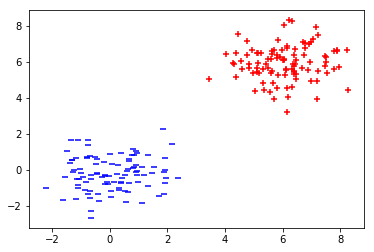

In [224]:
#Visualizing the data
plt.scatter(X1[0:100,1],X1[0:100,2],c='red',marker='+')
plt.scatter(X1[100:,1],X1[100:,2],c='blue',marker='_')

In [225]:
#Getting our optimized beta values
beta = fit(X, Y)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
beta

array([[42.95407654],
       [-5.68007106],
       [-7.68966049]])

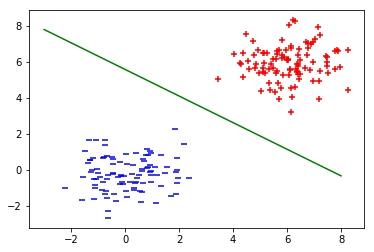

In [227]:
plt.scatter(X1[0:100,1],X1[0:100,2],c='red',marker='+')
plt.scatter(X1[100:,1],X1[100:,2],c='blue',marker='_')
#Plotting the decision boundary
xplot = np.linspace(-3,8)
yplot=(-1*beta[0] - beta[1]*xplot)/beta[2]
plt.plot(xplot,yplot,'g-')

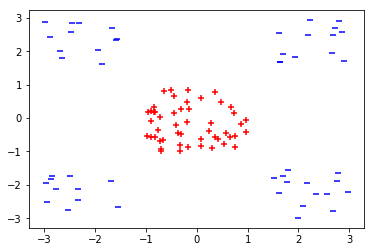

In [228]:
X2, Y2 = csplay_data()
plt.scatter(X2[0:50,1],X2[0:50,2],c='red',marker='+')
plt.scatter(X2[50:,1],X2[50:,2],c='blue',marker='_')

In [229]:
X2=np.insert(X2,3,X2[:,1]**2, axis=1)
#Adding the column x^2

In [230]:
X2=np.insert(X2,4,X2[:,2]**2, axis=1)
#Adding the column y^2

In [231]:
XX,YY = sampler(X2,Y2)
#Convert Y into column vector
YY=YY.reshape(XX.shape[0],1)

In [290]:
#fit has many parameters set to default. We can give custom values instead of these defaults.
beta2=fit(XX,YY,epochs=1000,step_size=0.1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [291]:
beta2

array([[115.93488955],
       [ -4.09458081],
       [ -3.14911906],
       [-26.59746176],
       [-27.99192943]])

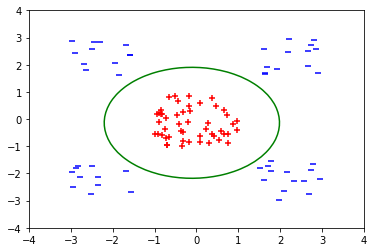

In [292]:
#Plotting the decision boundary
xplt=np.linspace(-4,4)
yplt=np.linspace(-4,4)
xx,yy=np.meshgrid(xplt,yplt)
F = beta2[0] + beta[1]*xx + beta[2]*yy + beta2[3]*(xx**2) + beta2[4]*(yy**2)
plt.contour(xx,yy,F,[0],colors='green',linestyles='solid')

plt.scatter(X2[0:50,1],X2[0:50,2],c='red',marker='+')
plt.scatter(X2[50:,1],X2[50:,2],c='blue',marker='_')